<a href="https://colab.research.google.com/github/usafhulk/Biodiversity/blob/main/biodiversity%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_species = pd.read_csv('species_info.csv')
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
df_observations = pd.read_csv('observations.csv')
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
print("df_species length: ", len(df_species))
print("df_observations length:  ", len(df_observations))

df_species length;  5824
df_observations length;  23296


In [12]:
print("_____________________________________________________________________________________________")
print("df_species stats: ",df_species.describe())
print("_____________________________________________________________________________________________")
print("df_species info: ", df_species.info())
print("_____________________________________________________________________________________________")
print("Nulls in df_species: ", df_species.isnull().sum())
print("_____________________________________________________________________________________________")
print("df_observations stats: ", df_observations.describe())
print("_____________________________________________________________________________________________")
print("df_observations info: ", df_observations.info())
print("_____________________________________________________________________________________________")
print("Nulls in df_observations: ", df_observations.isnull().sum())
print("_____________________________________________________________________________________________")

_____________________________________________________________________________________________
df_species stats:                category       scientific_name        common_names  \
count             5824                  5824                5824   
unique               7                  5541                5504   
top     Vascular Plant  Hypochaeris radicata  Brachythecium Moss   
freq              4470                     3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
_____________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   

#### Insights from the Statistical and Information Outputs:

1. two related datasets: df_species contains information about the species themselves (category, names, conservation status), and df_observations contains records of where and how many times species were observed.
2. df_species has a manageable number of rows but a significant amount of missing data in the conservation_status column.
3. df_observations is a larger dataset with many entries representing specific observations. It appears to be complete with no missing values in the 'observations' column, and likely none in the other columns as well.
4. The distribution of observation counts is right-skewed, meaning lower counts are more frequent.
5. The most prevalent species category is 'Vascular Plant'.
6. Among species with a conservation status, 'Species of Concern' is the most common designation.

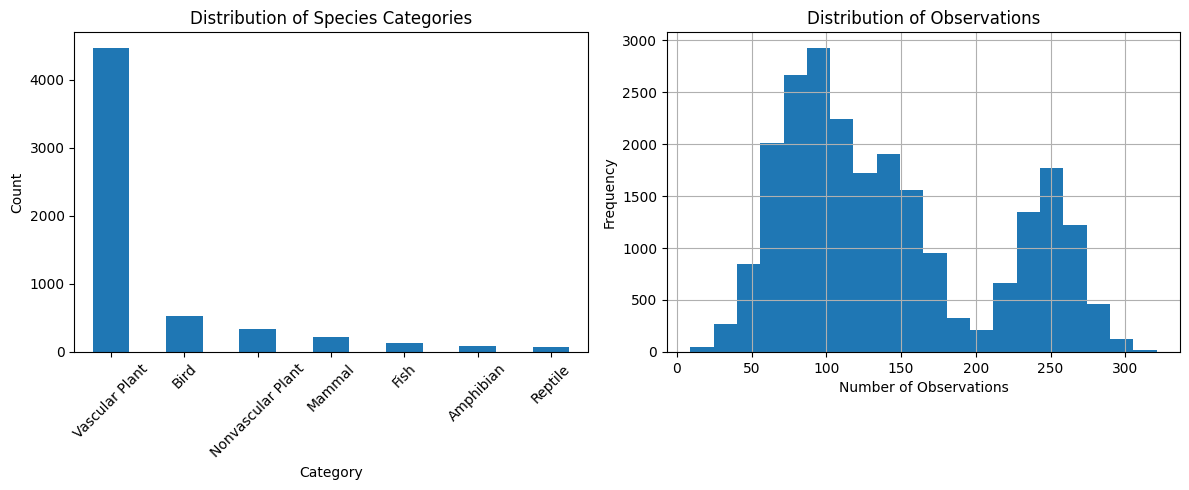

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for df_species
df_species['category'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of Species Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Histogram for df_observations
df_observations['observations'].hist(ax=axes[1], bins=20)
axes[1].set_title('Distribution of Observations')
axes[1].set_xlabel('Number of Observations')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Bar Plot: Distribution of Species Categories


- Dominance of Vascular Plants: The bar for 'Vascular Plant' is significantly taller than all other bars. This indicates that a large majority of the species in this dataset are vascular plants.
- Other Categories: Bars of varying heights for the other categories like 'Bird', 'Mammal', 'Fish', 'Reptile', 'Amphibian', and 'Nonvascular Plant'. The relative heights of these bars show the proportions of species in these groups compared to each other and to vascular plants. Birds and mammals are often well-represented, while amphibians and reptiles might be less numerous depending on the location the data was collected. Nonvascular plants are typically fewer than vascular plants.
- Insights: This plot tells us the taxonomic composition of the species included in the species_info.csv file. It highlights that the dataset is heavily weighted towards vascular plants, which is important to keep in mind when analyzing the data further.

2. Histogram: Distribution of Observations


- Right-Skewed Distribution: This means the tallest bars will be towards the left side of the histogram, indicating that a large number of observations recorded are low counts (e.g., 0, 1, 2, etc.).
- Few High Observation Counts: As I move to the right along the x-axis (higher observation counts), the bars will become progressively shorter and eventually disappear. This shows that instances of species being observed a very large number of times are much less frequent than instances of species being observed a small number of times.
- Insights: This histogram reveals that most entries in the observations.csv file represent situations where a particular species was observed only a few times in a specific park. It also shows that there are some instances where a species was observed many more times, though these are less common. This distribution is typical for observation data where some species are abundant or easily observed, while many others are less common or harder to spot.


In summary: The bar plot tells us about the types of species included in the dataset, showing a strong representation of vascular plants. The histogram tells us about the frequency of observation counts, indicating that most observations are low counts, with fewer instances of very high counts. These are important initial findings that can inform how I proceed with further analysis of the data.

In [32]:
print("_____________________________________________________________________________________________")
print(df_species.groupby('category').size())
print("_____________________________________________________________________________________________")
print(df_species.groupby('scientific_name').size())
print("_____________________________________________________________________________________________")
print(df_species.groupby('common_names').size())
print("_____________________________________________________________________________________________")
print(df_species.groupby('conservation_status').size())
print("_____________________________________________________________________________________________")
print(df_observations.groupby('observations').size())
print("_____________________________________________________________________________________________")
print(df_observations.groupby('scientific_name').size())
print("_____________________________________________________________________________________________")
print(df_observations.groupby('park_name').size())
print("_____________________________________________________________________________________________")

_____________________________________________________________________________________________
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
_____________________________________________________________________________________________
scientific_name
Abies bifolia                          1
Abies concolor                         1
Abies fraseri                          1
Abietinella abietina                   1
Abronia ammophila                      1
                                      ..
Zonotrichia leucophrys gambelii        1
Zonotrichia leucophrys oriantha        1
Zonotrichia querula                    1
Zygodon viridissimus                   1
Zygodon viridissimus var. rupestris    1
Length: 5541, dtype: int64
_____________________________________________________________________________________________
common_names
A Blueg

#### This output shows the number of times each specific observations count value appears in the df_observations DataFrame.

1. Interpretation: This output lists each unique observation count that occurred (from 9 up to 321) and how many times that exact count was recorded across all observations. The Length: 304 indicates that there are 304 unique values for the number of observations. For example, the observation count of 9 occurred 1 time, the count of 11 occurred 2 times, and so on. This granular view reinforces the histogram's message that many different specific observation counts occur, and it shows the frequency of each exact number. However, this doesn't directly show the distribution of counts within ranges as clearly as the histogram does.
Overall Insights from the Grouped Data Counts:

#### These outputs provide specific counts for the categories and unique values within key columns, supplementing the descriptive statistics and visualizations.
1. They confirm the strong dominance of 'Vascular Plant' in the species list.
2. They highlight that while scientific names are mostly unique identifiers, common names can sometimes be shared.
3. They precisely quantify the number of species in each category of conservation status for those species that have a status assigned.
4. They list the frequency of every specific observation count recorded, showing the diversity in the count values.
5. These counts are valuable for understanding the precise composition and distribution of data within these columns, providing a more detailed view than just the summary statistics.

In [36]:
df_species.fillna("No Intervention", inplace=True)
print(df_species.head())
print(df_species.groupby('conservation_status').size())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole     No Intervention  
1                              American Bison, Bison     No Intervention  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention  
4                                      Wapiti Or Elk     No Intervention  
conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


In [43]:
conservationCategory = df_species[df_species.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


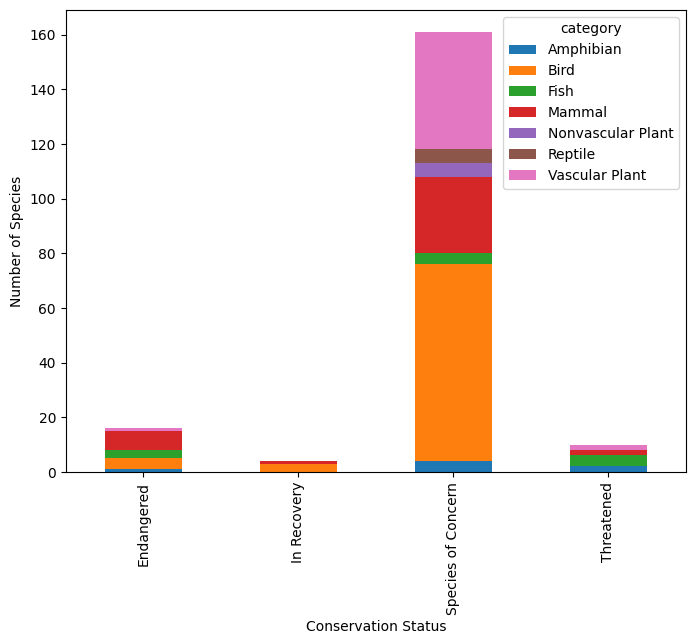

In [40]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Are certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`.

In [42]:
# Adding the as_protected column to the dataframe
df_species['is_protected'] = df_species.conservation_status != 'No Intervention'

# grouping by is_protected and category to see each species type and status of protection
category_counts = df_species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected',index='category',values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [45]:
# Adding a percent_protected category to make the number easily consumed
category_counts['percent_protected'] = (category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100).round(2)

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


# Statistical significance